<a href="https://colab.research.google.com/github/UrviSinghal28/Machine-Learning-with-Python/blob/main/Health%20Cost%20Predictor/predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.head()

--2022-01-22 07:07:01--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-01-22 07:07:01 (96.5 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [15]:
dataset["sex"] = pd.factorize(dataset["sex"])[0]
dataset["region"] = pd.factorize(dataset["region"])[0]
dataset["smoker"] = pd.factorize(dataset["smoker"])[0]

In [16]:
train_dataset = dataset.sample(frac=0.8)
test_dataset = dataset.drop(train_dataset.index)
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [17]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
478,21,1,36.9,0,1,1
861,38,0,28.0,3,1,0
68,40,0,36.2,0,1,1
1247,33,1,29.4,4,1,0
337,62,1,27.6,1,1,2


In [37]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(train_dataset))

In [117]:
model = keras.Sequential([
    normalizer,  
    layers.Dense(32),
    layers.Dense(16),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [118]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_49 (Dense)            (None, 32)                224       
                                                                 
 dense_50 (Dense)            (None, 16)                528       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_51 (Dense)            (None, 1)                 17        
                                                                 
Total params: 782
Trainable params: 769
Non-trainable params: 13
______________________________________________________

In [119]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae','mse'])

In [120]:
model.fit(train_dataset, train_labels, epochs=100, verbose=0, validation_split=0.5,)

9/9 - 0s - loss: 3994.0024 - mae: 3994.0024 - mse: 46647736.0000 - 34ms/epoch - 4ms/step
Testing set Mean Abs Error: 3994.00 expenses
The Mean Abs Error must be less than 3500. Keep trying.


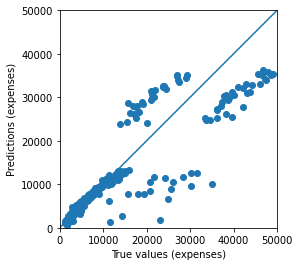

In [116]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
